Welcome to the second project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


### Question 1 - Classification vs. Regression
*Your goal for this project is to identify students who might need early intervention before they fail to graduate. Which type of supervised learning problem is this, classification or regression? Why?*

**Answer: This is a classification problem since the outcome is binary. The model needs to be able to correctly predict likelihood of pass and fail. In my opinion regression is more relevant when the outcome to be predicted is continuous like price of a house**

## Exploring the Data
Run the code cell below to load necessary Python libraries and load the student data. Note that the last column from this dataset, `'passed'`, will be our target label (whether the student graduated or didn't graduate). All other columns are features about each student.

In [0]:
from __future__ import division
import numpy as np
import pandas as pd
from time import time
from sklearn.metrics import f1_score

In [0]:
# Read student data
student_data = pd.read_csv("/content/drive/My Drive/student-data.csv")
print("Student data read successfully!")


Student data read successfully!


In [0]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,passed
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,no
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,no
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,yes
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,yes
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,yes


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 31 columns):
school        395 non-null object
sex           395 non-null object
age           395 non-null int64
address       395 non-null object
famsize       395 non-null object
Pstatus       395 non-null object
Medu          395 non-null int64
Fedu          395 non-null int64
Mjob          395 non-null object
Fjob          395 non-null object
reason        395 non-null object
guardian      395 non-null object
traveltime    395 non-null int64
studytime     395 non-null int64
failures      395 non-null int64
schoolsup     395 non-null object
famsup        395 non-null object
paid          395 non-null object
activities    395 non-null object
nursery       395 non-null object
higher        395 non-null object
internet      395 non-null object
romantic      395 non-null object
famrel        395 non-null int64
freetime      395 non-null int64
goout         395 non-null int64
Dalc          395 no

In [0]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000


In [0]:
# Create dataset for feature and outcomes
outcome = student_data['passed']
features = student_data.drop('passed', axis = 1)

### Implementation: Data Exploration
Let's begin by investigating the dataset to determine how many students we have information on, and learn about the graduation rate among these students. In the code cell below, you will need to compute the following:
- The total number of students, `n_students`.
- The total number of features for each student, `n_features`.
- The number of those students who passed, `n_passed`.
- The number of those students who failed, `n_failed`.
- The graduation rate of the class, `grad_rate`, in percent (%).


In [0]:
# TODO: Calculate number of students
n_students = features.shape[0]

# TODO: Calculate number of features
n_features = features.shape[1]

# TODO: Calculate passing students    #imp
import collections
n_passed = collections.Counter(outcome)['yes']

# TODO: Calculate failing students
import collections
n_failed = collections.Counter(outcome)['no']

# TODO: Calculate graduation rate
grad_rate = n_passed/(n_passed+n_failed)*100

# Print the results
print("Total number of students: {}".format(n_students))
print("Number of features: {}".format(n_features))
print("Number of students who passed: {}".format(n_passed))
print("Number of students who failed: {}".format(n_failed))
print("Graduation rate of the class: {:.2f}%".format(grad_rate))

Total number of students: 395
Number of features: 30
Number of students who passed: 265
Number of students who failed: 130
Graduation rate of the class: 67.09%


In [0]:
features.shape[0]

395

In [0]:
features.shape[1]

30

In [0]:
student_data.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'passed'],
      dtype='object')

## Preparing the Data
In this section, we will prepare the data for modeling, training and testing.

### Identify feature and target columns
It is often the case that the data you obtain contains non-numeric features. This can be a problem, as most machine learning algorithms expect numeric data to perform computations with.

Run the code cell below to separate the student data into feature and target columns to see if any features are non-numeric.

In [0]:
# Extract feature columns
feature_cols = list(student_data.columns[:-1])

# Extract target column 'passed'
target_col = student_data.columns[-1] 

# Show the list of columns
print("Feature columns:\n{}".format(feature_cols))
print("\nTarget column: {}".format(target_col))

# Separate the data into feature data and target data (X_all and y_all, respectively)
X_all = student_data[feature_cols]
y_all = student_data[target_col]

# Show the feature information by printing the first five rows
print("\nFeature values:")
print(X_all.head())

Feature columns:
['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']

Target column: passed

Feature values:
  school sex  age address famsize  ... goout  Dalc  Walc health absences
0     GP   F   18       U     GT3  ...     4     1     1      3        6
1     GP   F   17       U     GT3  ...     3     1     1      3        4
2     GP   F   15       U     LE3  ...     2     2     3      3       10
3     GP   F   15       U     GT3  ...     2     1     1      5        2
4     GP   F   16       U     GT3  ...     2     1     2      5        4

[5 rows x 30 columns]


In [0]:
list(student_data.columns[:-1])

['school',
 'sex',
 'age',
 'address',
 'famsize',
 'Pstatus',
 'Medu',
 'Fedu',
 'Mjob',
 'Fjob',
 'reason',
 'guardian',
 'traveltime',
 'studytime',
 'failures',
 'schoolsup',
 'famsup',
 'paid',
 'activities',
 'nursery',
 'higher',
 'internet',
 'romantic',
 'famrel',
 'freetime',
 'goout',
 'Dalc',
 'Walc',
 'health',
 'absences']

In [0]:
student_data.columns[-1]

'passed'

### Preprocess Feature Columns

As you can see, there are several non-numeric columns that need to be converted! Many of them are simply `yes`/`no`, e.g. `internet`. These can be reasonably converted into `1`/`0` (binary) values.

Other columns, like `Mjob` and `Fjob`, have more than two values, and are known as _categorical variables_. The recommended way to handle such a column is to create as many columns as possible values (e.g. `Fjob_teacher`, `Fjob_other`, `Fjob_services`, etc.), and assign a `1` to one of them and `0` to all others.

These generated columns are sometimes called _dummy variables_, and we will use the [`pandas.get_dummies()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html?highlight=get_dummies#pandas.get_dummies) function to perform this transformation. Run the code cell below to perform the preprocessing routine discussed in this section.

In [0]:
def preprocess_features(X):
    ''' Preprocesses the student data and converts non-numeric binary variables into
        binary (0/1) variables. Converts categorical variables into dummy variables. '''
    
    # Initialize new output DataFrame
    output = pd.DataFrame(index = X.index)

    # Investigate each feature column for the data
    for col, col_data in X.iteritems():
        
        # If data type is non-numeric, replace all yes/no values with 1/0
        if col_data.dtype == object:
            col_data = col_data.replace(['yes', 'no'], [1, 0])

        # If data type is categorical, convert to dummy variables
        if col_data.dtype == object:
            # Example: 'school' => 'school_GP' and 'school_MS'
            col_data = pd.get_dummies(col_data, prefix = col)  
        
        # Collect the revised columns
        output = output.join(col_data)
    
    return output

X_all = preprocess_features(X_all)
print "Processed feature columns ({} total features):\n{}".format(len(X_all.columns), list(X_all.columns))

Processed feature columns (48 total features):
['school_GP', 'school_MS', 'sex_F', 'sex_M', 'age', 'address_R', 'address_U', 'famsize_GT3', 'famsize_LE3', 'Pstatus_A', 'Pstatus_T', 'Medu', 'Fedu', 'Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'Fjob_at_home', 'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'reason_course', 'reason_home', 'reason_other', 'reason_reputation', 'guardian_father', 'guardian_mother', 'guardian_other', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']


In [0]:
def preprocess_features(X):
    ''' Preprocesses the student data and converts non-numeric binary variables into
        binary (0/1) variables. Converts categorical variables into dummy variables. '''
    
    # Initialize new output DataFrame
    output = pd.DataFrame(index = X.index)

    # Investigate each feature column for the data
    for col, col_data in X.iteritems():
        
        # If data type is non-numeric, replace all yes/no values with 1/0
        if col_data.dtype == object:
            col_data = col_data.replace(['yes', 'no'], [1, 0])

        # If data type is categorical, convert to dummy variables
        if col_data.dtype == object:
            # Example: 'school' => 'school_GP' and 'school_MS'
            col_data = pd.get_dummies(col_data, prefix = col)  
        
        # Collect the revised columns
        output = output.join(col_data)
    
    return output

X_all = preprocess_features(X_all)
print("Processed feature columns ({} total features):\n{}".format(len(X_all.columns), list(X_all.columns)))

Processed feature columns (48 total features):
['school_GP', 'school_MS', 'sex_F', 'sex_M', 'age', 'address_R', 'address_U', 'famsize_GT3', 'famsize_LE3', 'Pstatus_A', 'Pstatus_T', 'Medu', 'Fedu', 'Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'Fjob_at_home', 'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'reason_course', 'reason_home', 'reason_other', 'reason_reputation', 'guardian_father', 'guardian_mother', 'guardian_other', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']


In [0]:
student_data.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'passed'],
      dtype='object')

### Implementation: Training and Testing Data Split
So far, we have converted all _categorical_ features into numeric values. For the next step, we split the data (both features and corresponding labels) into training and test sets. In the following code cell below, you will need to implement the following:
- Randomly shuffle and split the data (`X_all`, `y_all`) into training and testing subsets.
  - Use 300 training points (approximately 75%) and 95 testing points (approximately 25%).
  - Set a `random_state` for the function(s) you use, if provided.
  - Store the results in `X_train`, `X_test`, `y_train`, and `y_test`.

In [0]:
# TODO: Import any additional functionality you may need here

# TODO: Set the number of training points
num_train = 300

# Set the number of testing points
num_test = X_all.shape[0] - num_train



# TODO: Shuffle and split the dataset into the number of training and testing points above
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=0.25, random_state=42)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 296 samples.
Testing set has 99 samples.


## Training and Evaluating Models
In this section, you will choose 3 supervised learning models that are appropriate for this problem and available in `scikit-learn`. You will first discuss the reasoning behind choosing these three models by considering what you know about the data and each model's strengths and weaknesses. You will then fit the model to varying sizes of training data (100 data points, 200 data points, and 300 data points) and measure the F<sub>1</sub> score. You will need to produce three tables (one for each model) that shows the training set size, training time, prediction time, F<sub>1</sub> score on the training set, and F<sub>1</sub> score on the testing set.

### Question 2 - Model Application
*List three supervised learning models that are appropriate for this problem. What are the general applications of each model? What are their strengths and weaknesses? Given what you know about the data, why did you choose these models to be applied?*

**Answer: The training dataset has 300 points and 48 features and we want to build a classifier model. This is a relatively small training set. The supervised learning models that I think are best suited are: 
1. Decision Tree classifier: Advantages include can be easier to interpret and explain. They easily handle feature interactions and they’re non-parametric. Random forests which is a group of decision trees are often the winner in classification problems. The weakness of decision trees is that they can easily overfit. It will be important to use gridsearch to identify the best max depth. Decision trees are used extensively in banking to say identify new credit card applicants likely to communicate fraud. This information can be put in simple rules and communicated which can help fraud investigation agents understand why an applicant is flagged for review. 
2. Support Vector Machines: Advantages include high accuracy and with an appropriate kernel they can work well even if the data is not linearly seperable. Disadvantages are that they are memory intensive and the output can be hard to interpret.General application includes image classification and detection of handwritten letters. 
3. Naive Bayes: Naive Bayes classifier tends to converge quicker than other methods so less training data is needed which is a criteria for grading here. It is also fast which is another grading criteria. Disadvantage is that the it assumes that attributes are independent which may not be true. Real world applications include classifying emails as spam or not spam or checking if twitter comment has positive or negative emotions. 
4. I think the Logistic Regression classifer can also be tried on this dataset. Logistic regression is intrinsically simple, it has low variance and so is less prone to over-fitting.Logistic Regression has many real world applications. I have personally used it for predicting response to an offer sent to a customer. Can also be used to predict if a person is likely to vote as democrat of republican.  
I don't feel comfortable using neural network since the dataset is very small and I think there is a risk of overfitting as well as because neural networks tend to be a blackbox solution.
If, I were to pick only 3 then I would choose - Decision Tree, Support Vector Machines and Logistic regression for this case because Naive Bayes assumes that the variables are independent and not correlated and I would think some of the above variables can be correlated, example parent's education and job are likely correlated. **

### Setup
Run the code cell below to initialize three helper functions which you can use for training and testing the three supervised learning models you've chosen above. The functions are as follows:
- `train_classifier` - takes as input a classifier and training data and fits the classifier to the data.
- `predict_labels` - takes as input a fit classifier, features, and a target labeling and makes predictions using the F<sub>1</sub> score.
- `train_predict` - takes as input a classifier, and the training and testing data, and performs `train_clasifier` and `predict_labels`.
 - This function will report the F<sub>1</sub> score for both the training and testing data separately.

In [0]:
def train_classifier(clf, X_train, y_train):
    ''' Fits a classifier to the training data. '''
    
    # Start the clock, train the classifier, then stop the clock
    start = time()
    clf.fit(X_train, y_train)
    end = time()
    
    # Print the results
    print("Trained model in {:.4f} seconds".format(end - start))

    
def predict_labels(clf, features, target):
    '''Makes predictions using a fit classifier based on F1 score. '''
    
    # Start the clock, make predictions, then stop the clock
    start = time()
    y_pred = clf.predict(features)
    end = time()
    
    # Print and return results
    print("Made predictions in {:.4f} seconds.".format(end - start))
    return f1_score(target.values, y_pred, pos_label='yes')


def train_predict(clf, X_train, y_train, X_test, y_test):
    ''' Train and predict using a classifer based on F1 score. '''
    
    # Indicate the classifier and the training set size
    print("Training a {} using a training set size of {}. . .".format(clf.__class__.__name__, len(X_train)))
    
    # Train the classifier
    train_classifier(clf, X_train, y_train)
    
    # Print the results of prediction for both training and testing
    print("F1 score for training set: {:.4f}.".format(predict_labels(clf, X_train, y_train)))
    print("F1 score for test set: {:.4f}.".format(predict_labels(clf, X_test, y_test)))

### Implementation: Model Performance Metrics
With the predefined functions above, you will now import the three supervised learning models of your choice and run the `train_predict` function for each one. Remember that you will need to train and predict on each classifier for three different training set sizes: 100, 200, and 300. Hence, you should expect to have 9 different outputs below — 3 for each model using the varying training set sizes. In the following code cell, you will need to implement the following:
- Import the three supervised learning models you've discussed in the previous section.
- Initialize the three models and store them in `clf_A`, `clf_B`, and `clf_C`.
 - Use a `random_state` for each model you use, if provided.
 - **Note:** Use the default settings for each model — you will tune one specific model in a later section.
- Create the different training set sizes to be used to train each model.
 - *Do not reshuffle and resplit the data! The new training points should be drawn from `X_train` and `y_train`.*
- Fit each model with each training set size and make predictions on the test set (9 in total).  
**Note:** Three tables are provided after the following code cell which can be used to store your results.

In [0]:
# TODO: Import the three supervised learning models from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
#from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

# TODO: Initialize the three models
clf_A = DecisionTreeClassifier(random_state=10)
clf_B = SVC()
clf_C = LogisticRegression()
clf_D = DecisionTreeClassifier(random_state=10, max_depth=4)

# TODO: Set up the training set sizes
X_train_100 = X_train[:100]
y_train_100 = y_train[:100]

X_train_200 = X_train[:200]
y_train_200 = y_train[:200]

X_train_300 = X_train[:300]
y_train_300 = y_train[:300]

# TODO: Execute the 'train_predict' function for each classifier and each training set size
# loop thru models, then thru train sizes
for clf in [clf_A, clf_B, clf_C, clf_D]:
    print("\n{}: \n".format(clf.__class__.__name__))
    for n in [100, 200, 300]:
        train_predict(clf, X_train[:n], y_train[:n], X_test, y_test)


DecisionTreeClassifier: 

Training a DecisionTreeClassifier using a training set size of 100. . .
Trained model in 0.0033 seconds
Made predictions in 0.0010 seconds.
F1 score for training set: 1.0000.
Made predictions in 0.0012 seconds.
F1 score for test set: 0.6357.
Training a DecisionTreeClassifier using a training set size of 200. . .
Trained model in 0.0029 seconds
Made predictions in 0.0011 seconds.
F1 score for training set: 1.0000.
Made predictions in 0.0010 seconds.
F1 score for test set: 0.7463.
Training a DecisionTreeClassifier using a training set size of 296. . .
Trained model in 0.0036 seconds
Made predictions in 0.0011 seconds.
F1 score for training set: 1.0000.
Made predictions in 0.0011 seconds.
F1 score for test set: 0.5968.

SVC: 

Training a SVC using a training set size of 100. . .
Trained model in 0.0029 seconds
Made predictions in 0.0020 seconds.
F1 score for training set: 0.7821.
Made predictions in 0.0016 seconds.
F1 score for test set: 0.7673.
Training a SVC u

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [0]:
X_train[:100]

,school_GP,school_MS,sex_F,sex_M,age,address_R,address_U,famsize_GT3,famsize_LE3,Pstatus_A,Pstatus_T,Medu,Fedu,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences
16,1,0,1,0,16,0,1,1,0,0,1,4,4,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,1,3,0,0,1,1,1,1,1,1,0,3,2,3,1,2,2,6
66,1,0,0,1,15,0,1,1,0,1,0,4,4,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,4,0,0,1,0,1,0,1,1,1,1,3,3,5,5,3,4
211,1,0,0,1,17,0,1,0,1,0,1,4,4,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,1,2,0,0,1,1,0,1,1,1,1,5,3,5,4,5,3,13
7,1,0,1,0,17,0,1,1,0,1,0,4,4,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,2,2,0,1,1,0,0,1,1,0,0,4,1,4,1,1,1,6
19,1,0,0,1,16,0,1,0,1,0,1,4,3,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,1,0,0,0,1,1,1,1,1,0,3,1,3,1,3,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183,1,0,1,0,17,0,1,0,1,0,1,3,3,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,2,0,0,1,0,1,1,1,1,1,5,3,3,2,3,1,56
220,1,0,1,0,17,1,0,1,0,0,1,2,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,2,2,0,0,1,0,1,1,1,1,0,4,2,5,1,2,5,2
312,1,0,0,1,19,0,1,1,0,0,1,1,2,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,1,2,1,0,0,0,0,0,1,1,0,4,5,2,2,2,4,3
336,1,0,1,0,19,1,0,1,0,1,0,3,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,1,3,1,0,0,1,0,1,1,0,0,5,4,3,1,2,5,12


### Tabular Results
Edit the cell below to see how a table can be designed in [Markdown](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet#tables). You can record your results from above in the tables provided.

## Choosing the Best Model
In this final section, you will choose from the three supervised learning models the *best* model to use on the student data. You will then perform a grid search optimization for the model over the entire training set (`X_train` and `y_train`) by tuning at least one parameter to improve upon the untuned model's F<sub>1</sub> score. 

**Answer: All three models tested above have very good performance on the test data and F1 score increases as more sample is added. The decision tree model with default parameters has F1 score = 1 on train which implies it has overfit. To avoid this I created a new classifer D with max_depth =4 and this also results in much better performance on test set.  However we have to make a choice. Among the three models, SVM has the highest prediction time to train and test, 4-5 times that of the other two. Since this is a grading criteria, this model should be the first to be  dropped from consideration. Now, decision tree with max_depth of 4 and logistic regression have very similar F1 score on the training sample of 100, but performance of logistic regression on training sample of 300 is better (F1 score of 0.8060 vs 0.7820 on test). Training and testing time are similar, decision trees might be a bit faster but I find this metric can vary a bit b/w runs. This is a tough choice between the two options here. 
I would chose decision trees as my preferred model. Here are the reasons why:
1. Biggest reason is that Decision tree tends to be easier to understand and explain. Occam's Razor suggests to pick the simplest hypothesis that fits the data, which in this case would be the decision tree classifier.
2. Performance of decision tree on test sample is very comparable to logistic regression for small sample - sample size 100. 
3. max_depth =4 was specified in the decision tree because otherwise the model was a severe overfit with F1 score = 1 on training data. I am planning to use grid search to optimize the value of max_depth and hopefully this brings F1 score closer to logistic regression. 
**

### Question 4 - Model in Layman's Terms
*In one to two paragraphs, explain to the board of directors in layman's terms how the final model chosen is supposed to work. For example if you've chosen to use a decision tree or a support vector machine, how does the model go about making a prediction?*

In [0]:
feature_names = list(X_train.columns)
class_names = 'passed'

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


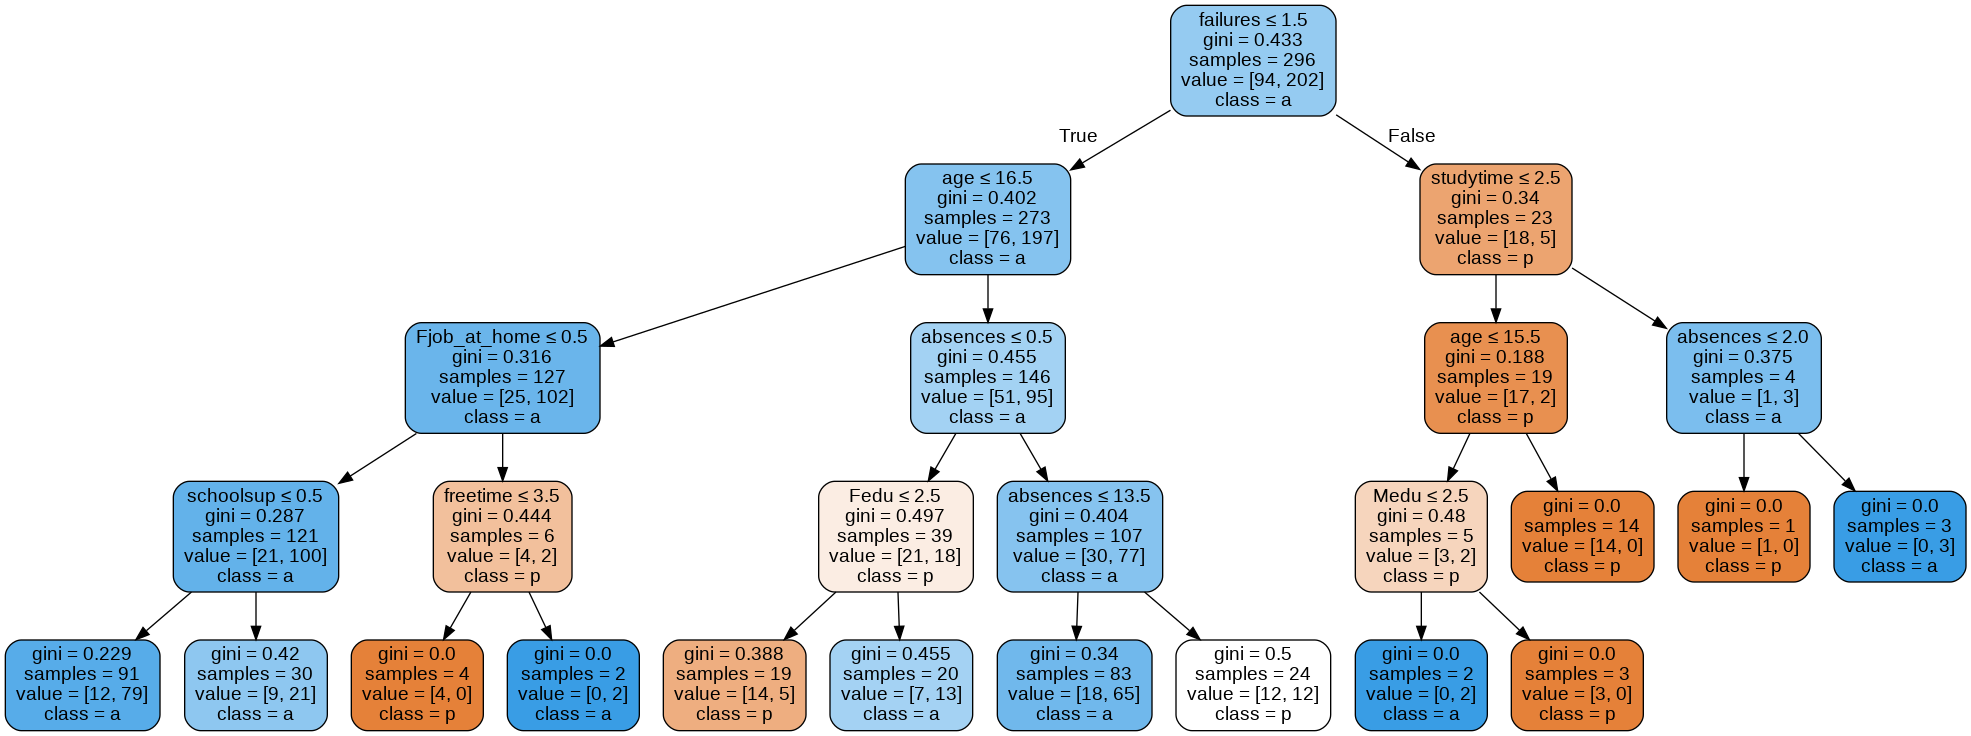

In [0]:
# Visualize the tree             #imp
from sklearn import tree
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus 
classifier = clf_D.fit(X_train, y_train)
dot_data = StringIO()  
tree.export_graphviz(classifier, out_file=dot_data,  
                         feature_names= feature_names,  
                         class_names= class_names,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

### Implementation: Model Tuning
Fine tune the chosen model. Use grid search (`GridSearchCV`) with at least one important parameter tuned with at least 3 different values. You will need to use the entire training set for this. In the code cell below, you will need to implement the following:
- Import [`sklearn.grid_search.gridSearchCV`](http://scikit-learn.org/stable/modules/generated/sklearn.grid_search.GridSearchCV.html) and [`sklearn.metrics.make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html).
- Create a dictionary of parameters you wish to tune for the chosen model.
 - Example: `parameters = {'parameter' : [list of values]}`.
- Initialize the classifier you've chosen and store it in `clf`.
- Create the F<sub>1</sub> scoring function using `make_scorer` and store it in `f1_scorer`.
 - Set the `pos_label` parameter to the correct value!
- Perform grid search on the classifier `clf` using `f1_scorer` as the scoring method, and store it in `grid_obj`.
- Fit the grid search object to the training data (`X_train`, `y_train`), and store it in `grid_obj`.

In [0]:
def performance_metric(y_true, y_predict):
    return f1_score(y_true, y_predict, pos_label='yes')

In [0]:
# TODO: Import 'gridSearchCV' and 'make_scorer'
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
    
# TODO: Create the parameters list you wish to tune
parameters = {'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}

# TODO: Initialize the classifier
clf = DecisionTreeClassifier(random_state=10)

# TODO: Make an f1 scoring function using 'make_scorer' 
f1_scorer = make_scorer(performance_metric)

# TODO: Perform grid search on the classifier using the f1_scorer as the scoring method
grid_obj = GridSearchCV(clf, parameters, f1_scorer)

# TODO: Fit the grid search object to the training data and find the optimal parameters
grid_obj = grid_obj.fit(X_train, y_train)

# Get the estimator
clf = grid_obj.best_estimator_

# Report the final F1 score for training and testing after parameter tuning
print("Tuned model has a training F1 score of {:.4f}.".format(predict_labels(clf, X_train, y_train)))
print("Tuned model has a testing F1 score of {:.4f}.".format(predict_labels(clf, X_test, y_test)))

# Optimal max_depth
# Produce the value for 'max_depth'
print("Parameter 'max_depth' is {} for the optimal model.".format(clf.get_params()['max_depth']))

Made predictions in 0.0009 seconds.
Tuned model has a training F1 score of 0.8351.
Made predictions in 0.0009 seconds.
Tuned model has a testing F1 score of 0.8026.
Parameter 'max_depth' is 2 for the optimal model.


### Question 5 - Final F<sub>1</sub> Score
*What is the final model's F<sub>1</sub> score for training and testing? How does that score compare to the untuned model?*

**Answer: The tuned model has a F1 score of 0.8026 on testing compared to 0.6357 obtained on untuned model. On the training dataset tuned model has a F1 score of 0.8351 and untuned had 1.000 indicating that the untuned model was overfit on training data. The F1 score on testing is the more relevant metric. Prediction time on training and testing is very small - 0.0004 seconds. The tuned model has approxmately same performance than Logistic regression on full sample (0.8026 vs 0.8028), however I prefer decision trees as they are simpler to understand and implement. The tuned model has an optimal max_depth of 2 and this model is plotted below.**

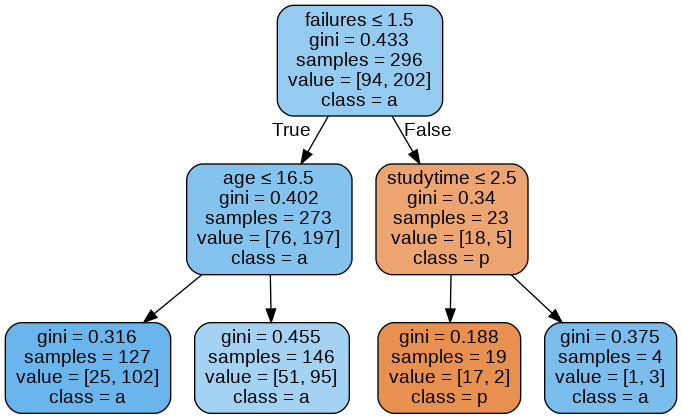

In [0]:
#Visualize the optimal decision tree    #Imp
from sklearn import tree
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus 
classifier = clf.fit(X_train, y_train)
dot_data = StringIO()  
tree.export_graphviz(classifier, out_file=dot_data,  
                         feature_names= feature_names,  
                         class_names= class_names,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())